In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [2]:
rain_df = pd.read_csv('WeatherAUS.csv')
rain_df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
rain_df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
rain_df = rain_df.dropna(subset=['RainToday','RainTomorrow'] , axis=0)

In [6]:
rain_df.isna().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [7]:
input_features = list(rain_df.columns)[1:-1]
target = 'RainTomorrow';
input_features,target

(['Location',
  'MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustDir',
  'WindGustSpeed',
  'WindDir9am',
  'WindDir3pm',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm',
  'RainToday'],
 'RainTomorrow')

<Axes: xlabel='Date', ylabel='count'>

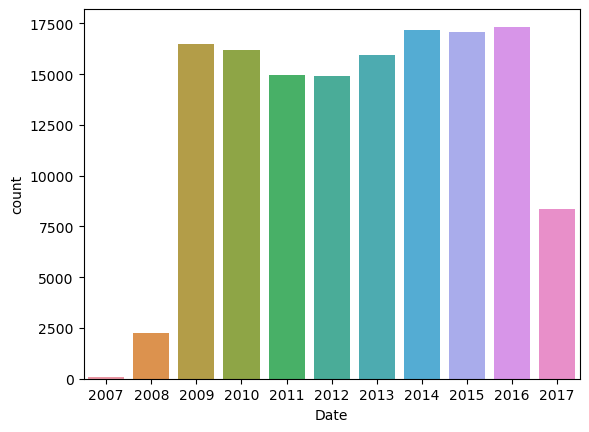

In [8]:
year = pd.to_datetime(rain_df.Date).dt.year
sns.countplot(rain_df,x=year)

In [9]:
year = pd.to_datetime(rain_df.Date).dt.year

train_data = rain_df[year<2015].copy()
val_data = rain_df[year==2015].copy()
test_data = rain_df[year>2015].copy()

train_data.shape,val_data.shape,test_data.shape

((97988, 23), (17089, 23), (25710, 23))

In [10]:
numerical_features = list(rain_df.select_dtypes(include=np.number).columns)
categorical_features = list(rain_df.select_dtypes(include='object').columns)[1:-1]

numerical_features,categorical_features

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'],
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [11]:
train_data[numerical_features].isna().sum().sort_values()

Rainfall             0
MaxTemp            187
MinTemp            314
Temp9am            574
Temp3pm            596
WindSpeed9am       874
Humidity9am       1052
WindSpeed3pm      1069
Humidity3pm       1116
WindGustSpeed     6828
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Evaporation      36331
Sunshine         40046
dtype: int64

In [12]:
train_input = train_data[input_features]
train_target = train_data[target]
val_input = val_data[input_features]
val_target = val_data[target]
test_input = test_data[input_features]
test_target = test_data[target]

In [13]:
train_input.isna().sum().sort_values()

Location             0
Rainfall             0
RainToday            0
MaxTemp            187
MinTemp            314
Temp9am            574
Temp3pm            596
WindSpeed9am       874
Humidity9am       1052
WindSpeed3pm      1069
Humidity3pm       1116
WindDir3pm        1952
WindGustSpeed     6828
WindGustDir       6868
WindDir9am        7019
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Evaporation      36331
Sunshine         40046
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [15]:
imputer.fit(rain_df[numerical_features])

SimpleImputer()

In [16]:
train_input[numerical_features] = imputer.transform(train_input[numerical_features])
val_input[numerical_features] = imputer.transform(val_input[numerical_features])
test_input[numerical_features] = imputer.transform(test_input[numerical_features])

C:\Users\odins\AppData\Local\Temp\ipykernel_9920\445395240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input[numerical_features] = imputer.transform(train_input[numerical_features])
C:\Users\odins\AppData\Local\Temp\ipykernel_9920\445395240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_input[numerical_features] = imputer.transform(val_input[numerical_features])
C:\Users\odins\AppData\Local\Temp\ipykernel_9920\445395240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a c

In [17]:
train_input[numerical_features].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [19]:
train_input[numerical_features].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,12.008398,23.022609,2.372935,5.357666,7.617805,40.198776,14.091355,18.763152,68.630871,51.469317,1017.526831,1015.144057,4.348731,4.443238,16.836016,21.541069
std,6.337005,6.977735,8.518819,3.136123,2.913498,13.212242,8.944051,8.823879,18.900823,20.637576,6.735769,6.663187,2.299375,2.142256,6.385810,6.810814
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,3.800000,7.500000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.400000,1010.900000,3.000000,3.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,5.472516,7.630540,39.000000,13.000000,19.000000,69.000000,52.000000,1017.654577,1015.257963,4.431161,4.499250,16.600000,21.000000
75%,16.600000,27.900000,0.800000,5.600000,9.200000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.300000,6.000000,6.000000,21.300000,26.100000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
scaler.fit(rain_df[numerical_features])

MinMaxScaler()

In [22]:
train_input[numerical_features] = scaler.transform(train_input[numerical_features])
val_input[numerical_features] = scaler.transform(val_input[numerical_features])
test_input[numerical_features] = scaler.transform(test_input[numerical_features])

C:\Users\odins\AppData\Local\Temp\ipykernel_9920\698909803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input[numerical_features] = scaler.transform(train_input[numerical_features])
C:\Users\odins\AppData\Local\Temp\ipykernel_9920\698909803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_input[numerical_features] = scaler.transform(val_input[numerical_features])
C:\Users\odins\AppData\Local\Temp\ipykernel_9920\698909803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [23]:
train_input[numerical_features].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.525947,0.006396,0.036949,0.525366,0.265107,0.108395,0.215668,0.686309,0.514693,0.612014,0.608705,0.483192,0.493693,0.507089,0.517103
std,0.149458,0.131904,0.022962,0.021628,0.200931,0.102420,0.068800,0.101424,0.189008,0.206376,0.111335,0.106611,0.255486,0.238028,0.134722,0.130726
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037741,0.526244,0.255814,0.100000,0.218391,0.690000,0.520000,0.614125,0.610527,0.492351,0.499917,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


In [24]:
unique_features = dict(train_input[categorical_features].nunique())
unique_features

{'Location': 49,
 'WindGustDir': 16,
 'WindDir9am': 16,
 'WindDir3pm': 16,
 'RainToday': 2}

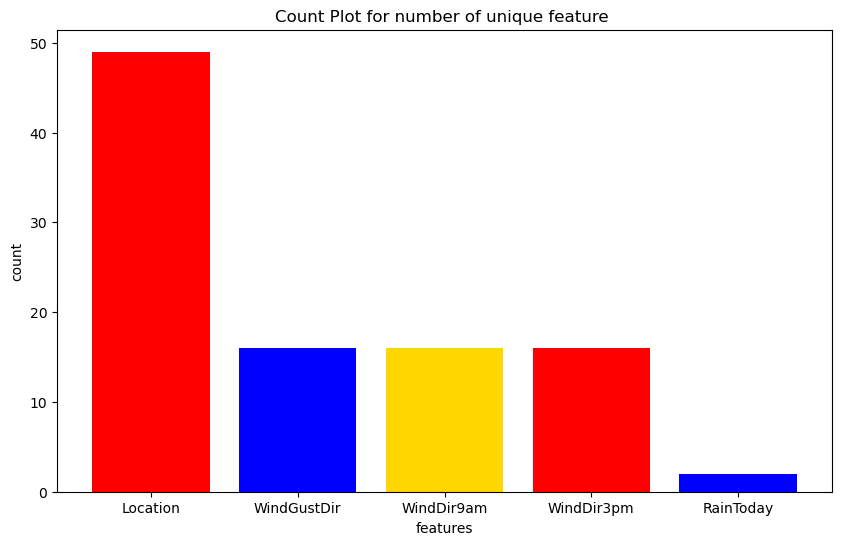

In [25]:

    plt.figure(figsize=(10, 6))
    plt.xlabel('features')
    plt.ylabel('count')
    plt.bar(unique_features.keys(),unique_features.values(),color=['red','blue','gold'])
    plt.title(f'Count Plot for number of unique feature ')
    plt.show()


In [26]:
from sklearn.preprocessing import OneHotEncoder
# ?OneHotEncoder
encoder = OneHotEncoder(sparse=False,
    handle_unknown='ignore')

In [27]:
encoder.fit(rain_df[categorical_features])

d:\Users\odins\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [28]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [29]:
encoded_features = list(encoder.get_feature_names_out(categorical_features))
encoded_features

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [30]:
train_input[encoded_features] = encoder.transform(train_input[categorical_features])
val_input[encoded_features] = encoder.transform(val_input[categorical_features])
test_input[encoded_features] = encoder.transform(test_input[categorical_features])

C:\Users\odins\AppData\Local\Temp\ipykernel_9920\3182323927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input[encoded_features] = encoder.transform(train_input[categorical_features])
C:\Users\odins\AppData\Local\Temp\ipykernel_9920\3182323927.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input[encoded_features] = encoder.transform(train_input[categorical_features])
C:\Users\odins\AppData\Local\Temp\ipykernel_9920\3182323927.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is us

In [32]:
train_input[encoded_features]

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97988 entries, 0 to 144552
Columns: 123 entries, Location to RainToday_Yes
dtypes: float64(118), object(5)
memory usage: 92.7+ MB


In [34]:
train_input[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 97988 entries, 0 to 144552
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        97988 non-null  float64
 1   MaxTemp        97988 non-null  float64
 2   Rainfall       97988 non-null  float64
 3   Evaporation    97988 non-null  float64
 4   Sunshine       97988 non-null  float64
 5   WindGustSpeed  97988 non-null  float64
 6   WindSpeed9am   97988 non-null  float64
 7   WindSpeed3pm   97988 non-null  float64
 8   Humidity9am    97988 non-null  float64
 9   Humidity3pm    97988 non-null  float64
 10  Pressure9am    97988 non-null  float64
 11  Pressure3pm    97988 non-null  float64
 12  Cloud9am       97988 non-null  float64
 13  Cloud3pm       97988 non-null  float64
 14  Temp9am        97988 non-null  float64
 15  Temp3pm        97988 non-null  float64
dtypes: float64(16)
memory usage: 12.7 MB


In [37]:
train_input[encoded_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 97988 entries, 0 to 144552
Columns: 102 entries, Location_Adelaide to RainToday_Yes
dtypes: float64(102)
memory usage: 77.0 MB


In [39]:
train_target.info()

<class 'pandas.core.series.Series'>
Index: 97988 entries, 0 to 144552
Series name: RainTomorrow
Non-Null Count  Dtype 
--------------  ----- 
97988 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [41]:
from sklearn.tree import DecisionTreeClassifier
?DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o

In [44]:
model.fit(train_input[numerical_features + encoded_features], train_target)

DecisionTreeClassifier(random_state=42)

In [45]:
train_sample = train_input[numerical_features + encoded_features]
val_sample = val_input[numerical_features + encoded_features]
test_sample = test_input[numerical_features + encoded_features]

In [46]:
train_pred = model.predict(train_sample)

In [47]:
 from sklearn.metrics import accuracy_score,confusion_matrix

In [48]:
accuracy_score(train_target,train_pred)

0.9999795893374699

## our model gives almost 100% accuracy on the train dataset and low on the test datasets hence our model is a conditon of overfitting


In [50]:
val_pred = model.predict(val_sample)

In [52]:
accuracy_score(val_target,val_pred)

0.7936684416876353

In [53]:
values = dict(val_target.value_counts())
values

{'No': 13511, 'Yes': 3578}

In [55]:
for value,count in values.items():
    total_count = val_target.count()
    print(f'{value} % = ',count*100/total_count)

No % =  79.06255485985136
Yes % =  20.937445140148633


## inference : our dumb model which would always give no would have higher accuracy than our model

# Hence we must do some hyperparameter tunning to prevent the overfitting condition in our case

In [62]:
?model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier(random_state=42)
File:        d:\users\odins\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or 

In [63]:
features_names = train_sample.columns
importance = model.feature_importances_
features_names,importance

(Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
        'Humidity3pm',
        ...
        'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
        'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan',
        'RainToday_No', 'RainToday_Yes'],
       dtype='object', length=118),
 array([3.72348864e-02, 3.02750170e-02, 4.46807871e-02, 2.31016443e-02,
        4.74029876e-02, 6.02158346e-02, 2.59596261e-02, 2.87123098e-02,
        3.72718924e-02, 2.78696714e-01, 3.74751640e-02, 6.22463592e-02,
        1.50293521e-02, 1.72695492e-02, 3.51997396e-02, 3.28171151e-02,
        2.07437921e-03, 1.64079963e-03, 1.01783054e-03, 6.88212657e-04,
        1.48034667e-03, 1.10335980e-03, 1.19280342e-03, 1.77001797e-03,
        8.18956871e-04, 1.30986391e-03, 8.00314193e-04, 2.03677225e-03,
        1.38645663e-03, 4.84888047e-04, 6.08349928e-04, 1.26483304e-03,
        1.4525

In [64]:
importance_df = pd.DataFrame({
    'features':features_names,
    'importance':importance
})
importance_df = importance_df.sort_values(by='importance',ascending=False).head(10)
importance_df

,features,importance
9,Humidity3pm,0.278697
11,Pressure3pm,0.062246
5,WindGustSpeed,0.060216
4,Sunshine,0.047403
2,Rainfall,0.044681
10,Pressure9am,0.037475
8,Humidity9am,0.037272
0,MinTemp,0.037235
14,Temp9am,0.035200
15,Temp3pm,0.032817


Text(0.5, 1.0, 'feature vs importance')

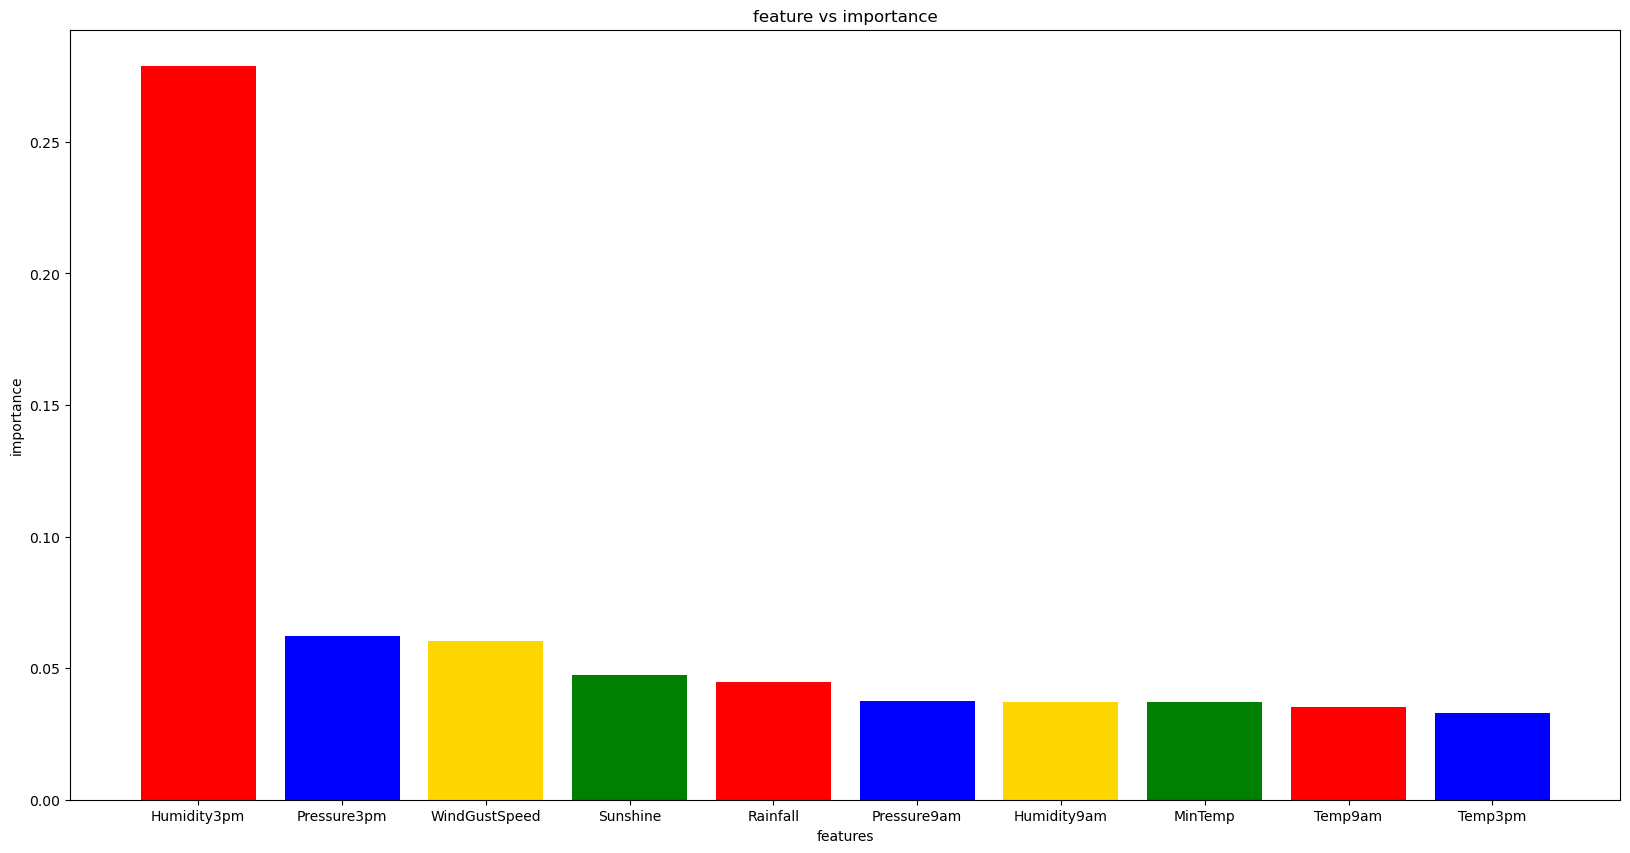

In [65]:

plt.figure(figsize=(20,10))
plt.xlabel('features')
plt.ylabel('importance')
plt.bar(importance_df['features'],importance_df['importance'],color=['red','blue','gold','green'])
plt.title('feature vs importance')

In [66]:
from sklearn.tree import plot_tree

In [67]:
model.tree_.max_depth

49

[Text(0.5, 0.9, 'Humidity3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]'),
 Text(0.25, 0.7, 'Humidity3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]'),
 Text(0.125, 0.5, 'Sunshine <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985, 3672]'),
 Text(0.0625, 0.3, 'Pressure3pm <= 0.58\ngini = 0.335\nsamples = 6010\nvalue = [4731, 1279]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'WindGustSpeed <= 0.391\ngini = 0.108\nsamples = 41647\nvalue = [39254, 2393]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'WindGustSpeed <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]'),
 Text(0.3125, 0.3, 'Rainfall <= 0.008\ngini = 0.304\nsamples = 27841\nvalue = [22637, 5204]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Pressure3pm <= 0.546\ngini = 0.495\nsamples = 6090\nvalue = [3353, 2737]'),


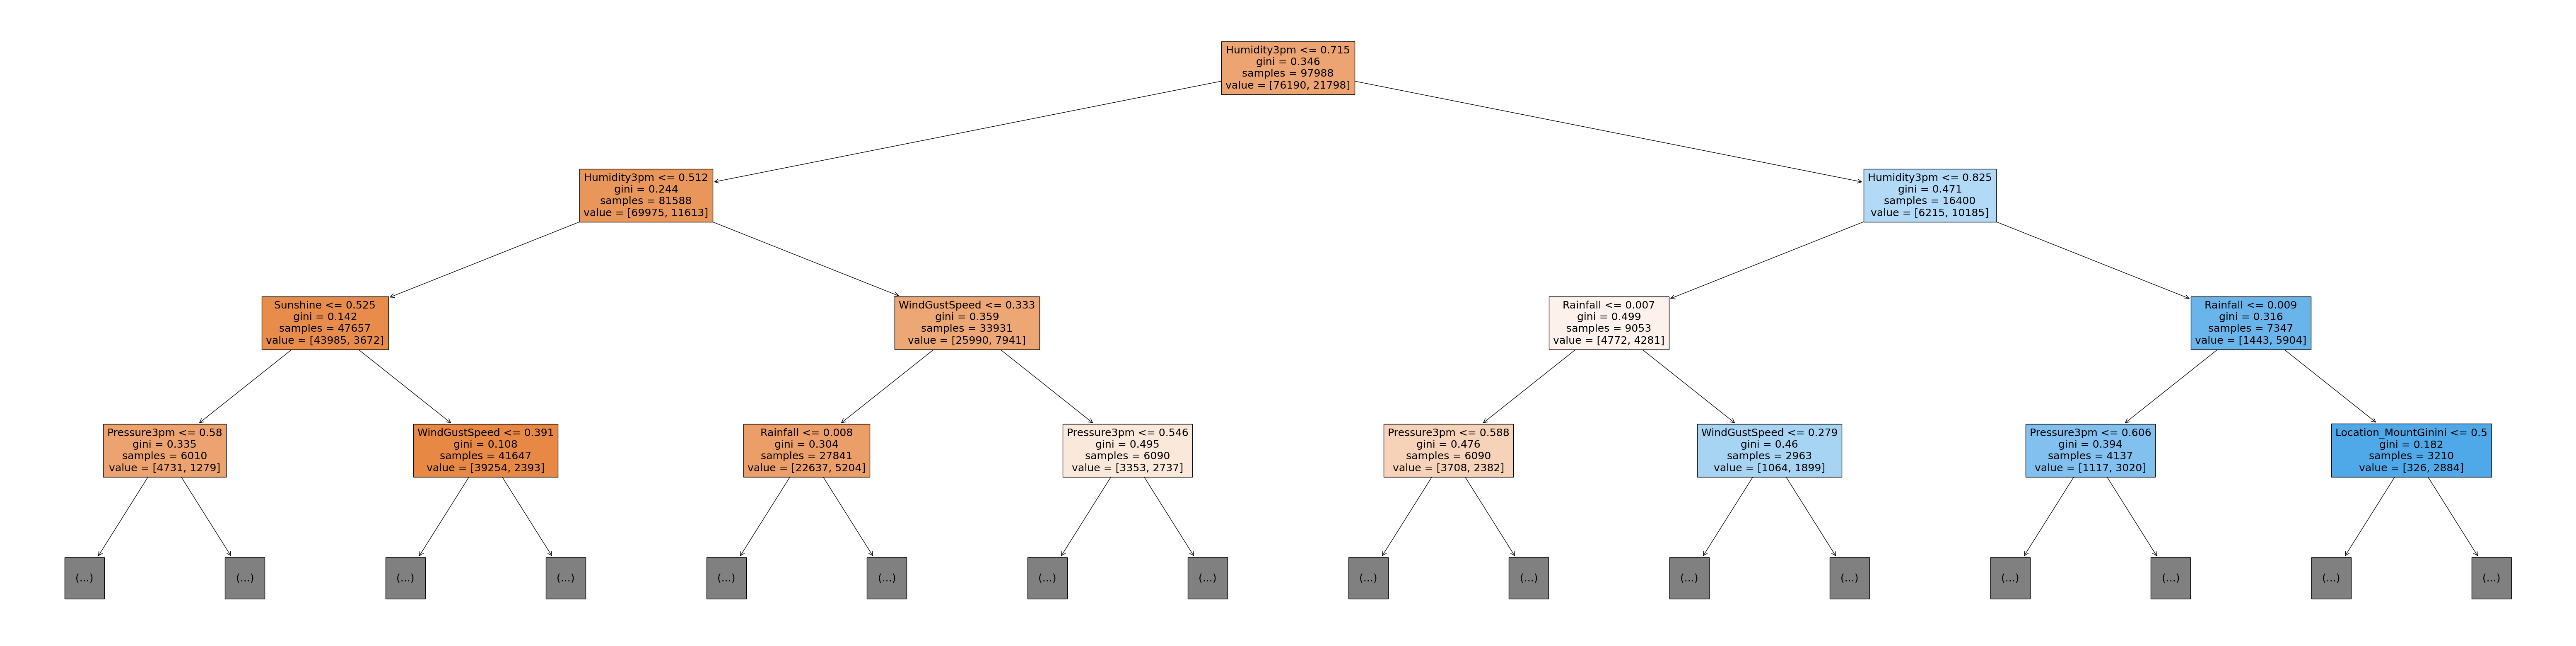

In [68]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=train_sample.columns,max_depth=3,filled=True)

In [70]:
model = DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(train_sample,train_target)
new_tr_pred = model.predict(train_sample)
accuracy_score(train_target,new_tr_pred)

0.8427562558680655

In [72]:
new_val_pred =  model.predict(val_sample)
accuracy_score(val_target,new_val_pred)

0.8418865937152554

In [74]:
model.score(train_sample,train_target)

0.8427562558680655

In [76]:
def best_depth(n):
    model = DecisionTreeClassifier(max_depth=n,random_state=42)
    model.fit(train_sample, train_target) 
    train_error = 1 - model.score(train_sample,train_target)
    val_error = 1 - model.score(val_sample, val_target)
    return {'Max Depth': n, 'Training Error': train_error, 'Validation Error': val_error}
    
    

In [77]:
error_df = pd.DataFrame([best_depth(n) for n in range(1,21)])

In [81]:
error_df

,Max Depth,Training Error,Validation Error
0,1,0.181941,0.176488
1,2,0.176930,0.170695
2,3,0.168408,0.165194
3,4,0.162153,0.161624
4,5,0.157244,0.158113
5,6,0.153131,0.155831
6,7,0.149059,0.154602
7,8,0.144814,0.153842
8,9,0.139435,0.154544
9,10,0.131802,0.154778


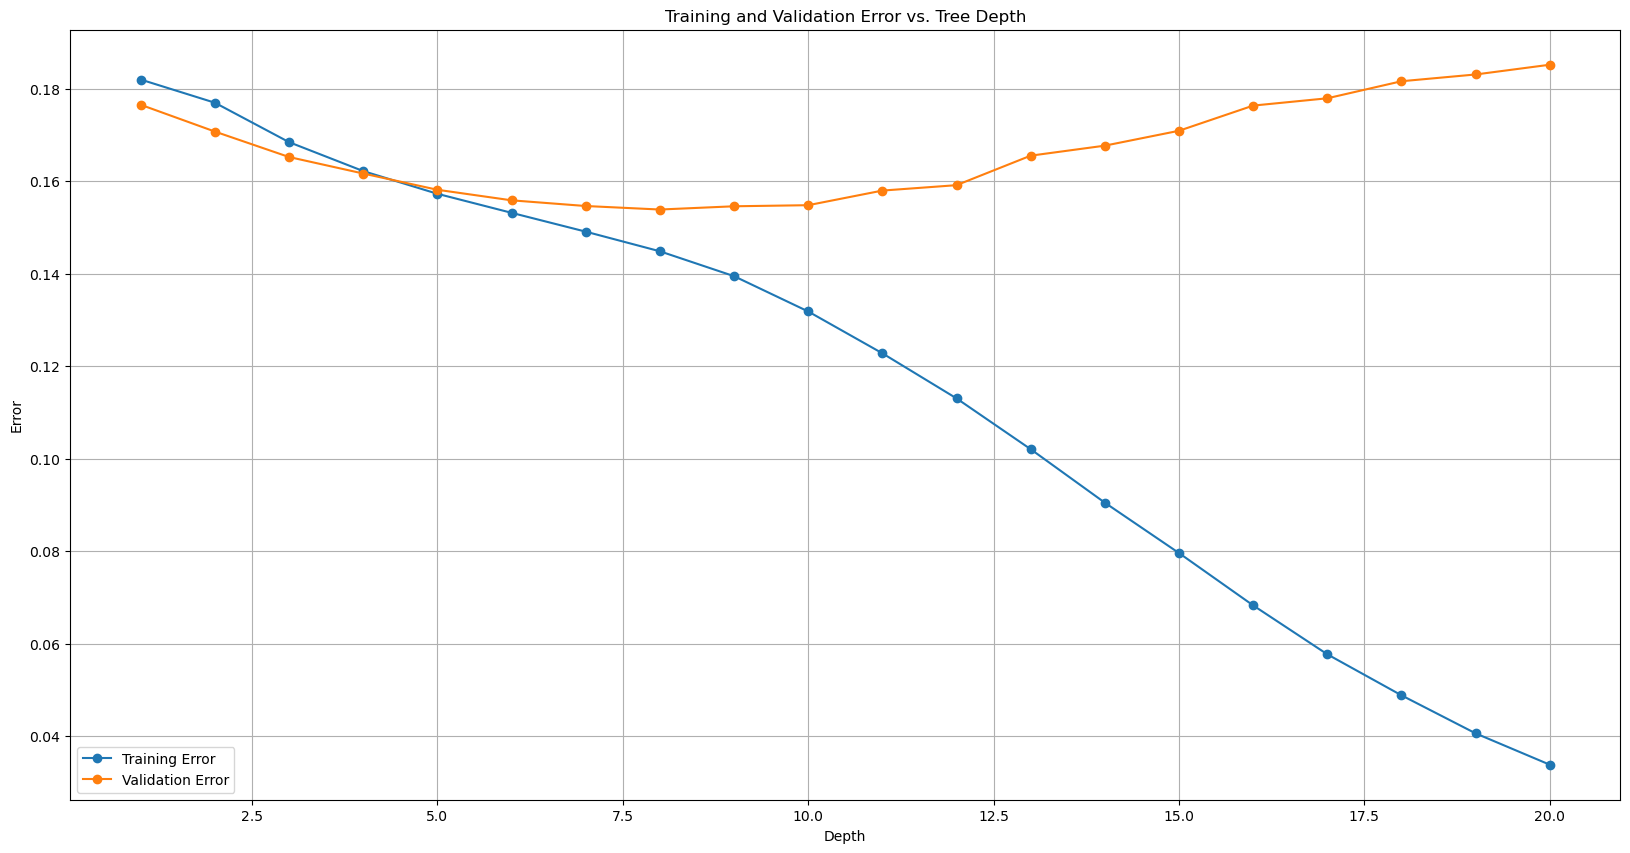

In [83]:
plt.figure(figsize=(20,10))

# Plot training error
plt.plot(error_df['Max Depth'], error_df['Training Error'], label='Training Error', marker='o')

# Plot validation error
plt.plot(error_df['Max Depth'], error_df['Validation Error'], label='Validation Error', marker='o')

# Add labels and title
plt.xlabel('Depth')
plt.ylabel('Error')
plt.title('Training and Validation Error vs. Tree Depth')

# Add a legend
plt.legend()

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()


## interpreting the graph it shows that the general model is at max-depth = 8
## after it the validation error increases

In [86]:
model =  model = DecisionTreeClassifier(max_depth=8,random_state=42)

In [88]:
model.fit(train_sample, train_target) 

DecisionTreeClassifier(max_depth=8, random_state=42)

In [89]:
model.score(train_sample,train_target)

0.8551863493488998

In [92]:
model.score(val_sample, val_target)

0.8461583474749839

In [96]:
model.score(test_sample,test_target)

0.832244262932711

In [97]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [98]:
def predict_input(model,new_input):
    input = pd.DataFrame([new_input])
    input[numerical_features] = imputer.transform(input[numerical_features])
    input[numerical_features] = scaler.transform(input[numerical_features])
    input[encoded_features] = encoder.transform(input[categorical_features])
    pred = model.predict(input[numerical_features + encoded_features])
    prob = model.predict_proba(input[numerical_features + encoded_features])

    print("Rain Tomorrow: ", pred[0])
    print("Probability of rain tomorrow is {:.2f}%".format(prob[0][1] * 100))
    print("Probability of no rain tomorrow is {:.2f}%".format(prob[0][0] * 100))
    return [pred,prob]

In [99]:
prediction = predict_input(model,new_input)
prediction

Rain Tomorrow:  Yes
Probability of rain tomorrow is 65.99%
Probability of no rain tomorrow is 34.01%


C:\Users\odins\AppData\Local\Temp\ipykernel_9920\550575696.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input[encoded_features] = encoder.transform(input[categorical_features])
C:\Users\odins\AppData\Local\Temp\ipykernel_9920\550575696.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input[encoded_features] = encoder.transform(input[categorical_features])
C:\Users\odins\AppData\Local\Temp\ipykernel_9920\550575696.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

[array(['Yes'], dtype=object), array([[0.3400936, 0.6599064]])]

In [100]:
import joblib

In [102]:
Aussie_rain_Descision_tree = {
    'input_features':input_features,
    'target':target,
    'numerical_features':numerical_features,
    'categorical_features':categorical_features,
    'encoded_features':encoded_features,
    'imputer':imputer,
    'scaler':scaler,
    'encoder':encoder,
    'model':model,
    'predict_input':predict_input
}
    

In [103]:
joblib.dump(Aussie_rain_Descision_tree,'Aussie_rain_Descision_tree.joblib')

['Aussie_rain_Descision_tree.joblib']

In [104]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 13.2,
             'Rainfall': 10.2,
             'Evaporation': 1.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 59.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 904.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [105]:
Aussie_rain_Descision_tree = joblib.load('Aussie_rain_Descision_tree.joblib')

In [109]:
Aussie_rain_Descision_tree['predict_input'](Aussie_rain_Descision_tree['model'],new_input)

Rain Tomorrow:  No
Probability of rain tomorrow is 32.63%
Probability of no rain tomorrow is 67.37%


C:\Users\odins\AppData\Local\Temp\ipykernel_9920\550575696.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input[encoded_features] = encoder.transform(input[categorical_features])
C:\Users\odins\AppData\Local\Temp\ipykernel_9920\550575696.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input[encoded_features] = encoder.transform(input[categorical_features])
C:\Users\odins\AppData\Local\Temp\ipykernel_9920\550575696.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

[array(['No'], dtype=object), array([[0.67368421, 0.32631579]])]

# Applying RandomForestClassifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
base_model = RandomForestClassifier(n_jobs=-1,random_state=42).fit(train_sample,train_target)

In [115]:
base_train_acc = base_model.score(train_sample,train_target)
base_train_acc

0.9999693840062048

In [116]:
base_val_acc = base_model.score(val_sample,val_target)
base_val_acc

0.8567499561121189

## we can see that applying RandomForest has increased our accuracy by 1.5% than using a single decision tree

## lets perform hypertuning to check for the best set of parameters for our model for better accuracy

In [120]:
?base_model

Type:        RandomForestClassifier
String form: RandomForestClassifier(n_jobs=-1, random_state=42)
Length:      100
File:        d:\users\odins\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" 

In [121]:
def test_predict(**params):
    model = RandomForestClassifier(n_jobs=-1,random_state=42,**params).fit(train_sample,train_target)
    train_acc = model.score(train_sample,train_target)
    val_acc =  model.score(val_sample,val_target)
    print(f'train_Acc = {train_acc}\nval_acc = {val_acc}')

In [122]:
test_predict(n_estimators = 50)

train_Acc = 0.9997040453933135
val_acc = 0.856164784364211


In [123]:
test_predict(n_estimators = 200)

train_Acc = 0.9999795893374699
val_acc = 0.8583299198314706


In [124]:
test_predict(n_estimators = 300)

train_Acc = 0.9999795893374699
val_acc = 0.8572180935104453


In [125]:
test_predict(n_estimators = 250)

train_Acc = 0.9999795893374699
val_acc = 0.8580373339575166


## n_estimators = 200
## train_Acc = 0.9999795893374699
##  val_acc = 0.85832991983147066

In [127]:
test_predict(max_depth=8)

train_Acc = 0.8437971996571009
val_acc = 0.8408918017438118


In [128]:
test_predict(max_depth=16)

train_Acc = 0.907529493407356
val_acc = 0.853765580197788


In [129]:
test_predict(max_depth=30)

train_Acc = 0.9937441319345226
val_acc = 0.8577447480835625


In [130]:
test_predict(max_depth=42)

train_Acc = 0.9999693840062048
val_acc = 0.8586225057054245


In [131]:
test_predict(max_depth=52)

train_Acc = 0.9999693840062048
val_acc = 0.856164784364211


## max_depth=42
## train_Acc = 0.9999693840062048## val_acc = 0.85862250570542455


In [190]:
test_predict(max_leaf_nodes = 2**5)

train_Acc = 0.8319488100583745
val_acc = 0.8348645327403593


In [192]:
test_predict(max_leaf_nodes = 2**10)

train_Acc = 0.8796281177287014
val_acc = 0.8514834103809468


In [196]:
test_predict(max_leaf_nodes = 2**15)

train_Acc = 0.9999693840062048
val_acc = 0.8565158874129557


In [204]:
test_predict(max_leaf_nodes = 2**25)

train_Acc = 0.9999693840062048
val_acc = 0.8565158874129557


## max_leaf_nodes = 2**20
## train_Acc = 0.9999693840062048## val_acc = 0.85651588741295577

In [210]:
test_predict(min_samples_split=10,min_samples_leaf=2)

train_Acc = 0.9357778503490223
val_acc = 0.8573936450348177


In [212]:
test_predict(min_samples_split=10,min_samples_leaf=4)

train_Acc = 0.9129689349716292
val_acc = 0.8562818187137925


In [214]:
test_predict(min_samples_split=10,min_samples_leaf=10)

train_Acc = 0.8798832510103278
val_acc = 0.8537070630229973


In [218]:
test_predict(min_samples_split=15,min_samples_leaf=2)

train_Acc = 0.9230007756051761
val_acc = 0.8567499561121189


In [222]:
test_predict(min_samples_split=20,min_samples_leaf=5)

train_Acc = 0.8948442666448952
val_acc = 0.856164784364211


## min_samples_split=10,min_samples_leaf=2
## train_Acc = 0.9357778503490223
## val_acc = 0.8573936450348177

In [225]:
?model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier(max_depth=8, random_state=42)
File:        d:\users\odins\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_sp

In [227]:
test_predict(max_features="sqrt")

train_Acc = 0.9999693840062048
val_acc = 0.8567499561121189


In [229]:
test_predict(max_features="log2")

train_Acc = 0.9999795893374699
val_acc = 0.8565158874129557


In [231]:
test_predict(max_features=11)

train_Acc = 0.9999693840062048
val_acc = 0.8560477500146293


In [233]:
test_predict(max_features=9)

train_Acc = 0.9999795893374699
val_acc = 0.8573936450348177


In [235]:
test_predict(max_features=8)

train_Acc = 0.9999795893374699
val_acc = 0.8567499561121189


## max_features=9
## train_Acc = 0.9999795893374699
## val_acc = 0.8573936450348177


In [240]:
test_predict(min_impurity_decrease=1e-6)

train_Acc = 0.9887435196146467
val_acc = 0.8569255076364913


In [244]:
test_predict(min_impurity_decrease=1e-2)

train_Acc = 0.7775441890843777
val_acc = 0.7906255485985136


In [246]:
test_predict(min_impurity_decrease=1e-8)

train_Acc = 0.9999795893374699
val_acc = 0.8581543683070981


In [ ]:
## min_impurity_decrease=1e-8
## train_Acc = 0.9999795893374699
## val_acc = 0.8581543683070981

In [250]:
test_predict(class_weight={'No':1,'Yes':2})

train_Acc = 0.9999693840062048
val_acc = 0.8557551641406753


In [256]:
test_predict(class_weight = 'balanced')

train_Acc = 0.9999795893374699
val_acc = 0.8558721984902569


In [262]:
test_predict(class_weight={'No':1,'Yes':1})

train_Acc = 0.9999693840062048
val_acc = 0.8567499561121189


# HyperParameter tuning

In [269]:
final_model = RandomForestClassifier(n_jobs = -1, random_state = 42, n_estimators = 200,
                                     max_depth=42, max_leaf_nodes = 2**20,min_samples_split=10,
                                     min_samples_leaf=2,max_features=9)

In [271]:
final_model.fit(train_sample,train_target)

RandomForestClassifier(max_depth=42, max_features=9, max_leaf_nodes=1048576,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [273]:
final_model.score(train_sample,train_target)

0.9337061681022166

In [275]:
final_model.score(val_sample,val_target)

0.8574521622096085

In [281]:
final_acc = final_model.score(test_sample,test_target)

In [283]:
base_acc = base_model.score(test_sample,test_target)

In [291]:
print(f'Final accuracy after parameter hypertuning is {final_acc * 100:.2f}%')
print(f'Base accuracy was {base_acc * 100:.2f}%')

Final accuracy after parameter hypertuning is 84.69%
Base accuracy was 84.57%


In [293]:
Aussie_Rain_RandomForest_model = {
    'input_features':input_features,
    'target':target,
    'numerical_features':numerical_features,
    'categorical_features':categorical_features,
    'encoded_features':encoded_features,
    'imputer':imputer,
    'scaler':scaler,
    'encoder':encoder,
    'model':final_model,
    'predict_input':predict_input
}
    

In [295]:
joblib.dump(Aussie_Rain_RandomForest_model, 'Aussie_Rain_RandomForest_model.joblib')

['Aussie_Rain_RandomForest_model.joblib']

In [297]:
Aussie_Rain_RandomForest_model = joblib.load('Aussie_Rain_RandomForest_model.joblib')

In [299]:
Aussie_Rain_RandomForest_model['predict_input'](Aussie_Rain_RandomForest_model['model'],new_input)

Rain Tomorrow:  Yes
Probability of rain tomorrow is 56.89%
Probability of no rain tomorrow is 43.11%


C:\Users\odins\AppData\Local\Temp\ipykernel_9920\550575696.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input[encoded_features] = encoder.transform(input[categorical_features])
C:\Users\odins\AppData\Local\Temp\ipykernel_9920\550575696.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input[encoded_features] = encoder.transform(input[categorical_features])
C:\Users\odins\AppData\Local\Temp\ipykernel_9920\550575696.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

[array(['Yes'], dtype=object), array([[0.43107906, 0.56892094]])]

In [305]:
Aussie_Rain_RandomForest_model['model'].score(test_sample,test_target)

0.8468689225982108